# Data validation


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [84]:
DATA_FILE_DIR = 'data/faces.npy'
IMG_SIZE = 300

We load the dataset and split it into a training set and a validation set

In [85]:
data_set = np.load(DATA_FILE_DIR, allow_pickle = True)
print('The dataset has been loaded properly.')

The dataset has been loaded properly.


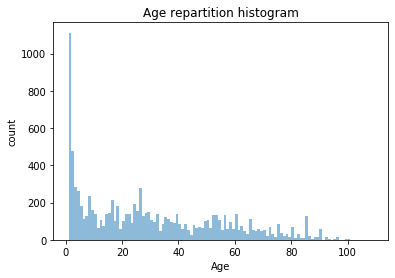

In [86]:
X = data_set[:,0]
Y = data_set[:,1]

age_min, age_max = min(Y), max(Y)

bins = np.arange(age_min, age_max, 1)

#plt.xlim([age_min-1, age_min+1])

plt.hist(Y, bins=bins, alpha=0.5)
plt.title('Age repartition histogram')
plt.xlabel('Age')
plt.ylabel('count')

plt.show()

We see that there are a lot more 1 and 2 year old pictures than the other ages. We truncate to get only a maximum of 200 pictures per category.

In [87]:
unique, counts = np.unique(Y, return_counts=True)
count_dict = dict(zip(unique, counts))
# build a boolean array to remove the pictures
for age, count in count_dict.items():
    if count > 200:
        n_yo_id = (np.array(Y) == age)
        X_n_yo = np.array(X)[n_yo_id]
        # the 200 images to keep
        X_n_yo = X_n_yo[:200]
        Y_n_yo = np.full(200, age)
        # array with all the pic for this age removed
        X_no_n = np.array(X)[np.logical_not(n_yo_id)]
        Y_no_n = np.array(Y)[np.logical_not(n_yo_id)]
        # add the 200 images to the array
        X = np.concatenate((X_no_n, X_n_yo))
        Y = np.concatenate((Y_no_n, Y_n_yo))
        
#reshuffle the arrays
p = np.random.permutation(len(X))
X, Y = X[p], Y[p]


We plot the histogram again to see if the cropping worked.

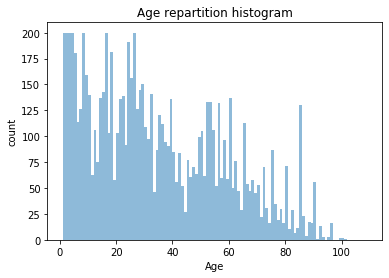

In [88]:
age_min, age_max = min(Y), max(Y)

bins = np.arange(age_min, age_max, 1)

#plt.xlim([age_min-1, age_min+1])

plt.hist(Y, bins=bins, alpha=0.5)
plt.title('Age repartition histogram')
plt.xlabel('Age')
plt.ylabel('count')

plt.show()

We check the first picture of the dataset

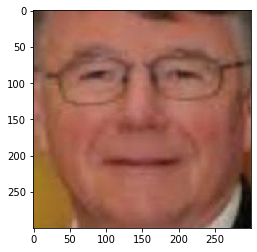

67 years old person


In [89]:
plt.imshow(X[0], cmap = 'gist_gray')
plt.show()
print('{} years old person'.format(Y[0]))

We save the new dataset.

In [90]:
DATA_FILE_DIR = 'data/faces_validated.npy'

validated_set = [X, Y]

print('Saving dataset')
np.save(DATA_FILE_DIR, validated_set)
print('The dataset has been saved in {}.'.format(DATA_FILE_DIR))

Saving dataset
The dataset has been saved in data/faces_validated.npy.
